# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import numpy as np
training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'].astype(np.float64), train['labels']
X_test, y_test = test['features'].astype(np.float64), test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
# Number of training examples
n_train = X_train.shape[0]

# Number of testing examples.
n_test = X_test.shape[0]

# What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# How many unique classes/labels there are in the dataset.
import pandas as pd
series_train_labels = pd.Series(y_train)
series_test_labels = pd.Series(y_test)
n_classes = max(series_train_labels.nunique(),series_test_labels.nunique())

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

35


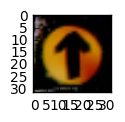

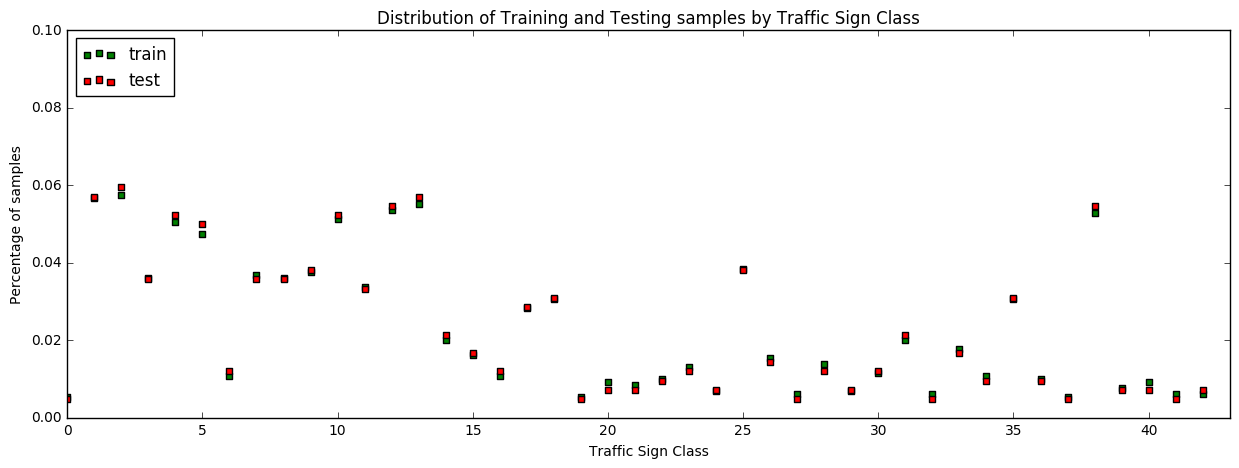

In [3]:
import random
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

index = random.randint(0, n_train)
image = X_train[index]

plt.figure(figsize=(1,1))
plt.imshow(image)
print(y_train[index])

d = {'class': range(n_classes),
     'train': series_train_labels.value_counts(), 
     'test': series_test_labels.value_counts()}
df = pd.DataFrame(d)
df['train'] = df['train']/(df['train'].sum(axis=0))
df['test'] = df['test']/(df['test'].sum(axis=0))

fig, ax = plt.subplots()
fig.set_size_inches(15, 5)

ax.scatter(df['class'], df['train'], s=20, c='g', marker="s", label='train')
ax.scatter(df['class'], df['test'], s=20, c='r', marker="s", label='test')
plt.legend(loc='upper left');
plt.axis([0, n_classes, 0, 0.1])
plt.title('Distribution of Training and Testing samples by Traffic Sign Class')
plt.xlabel('Traffic Sign Class')
plt.ylabel('Percentage of samples')
plt.show()



----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [4]:
# Preprocessing
from sklearn.utils import shuffle
from sklearn import preprocessing

X_train, y_train = shuffle(X_train, y_train)

print("Shape of X_train: ", X_train.shape)
for i in range(X_train.shape[0]):
    for j in range(X_train.shape[3]):
        X_train[i,:,:,j] = preprocessing.scale(X_train[i,:,:,j])

print("Shape of X_test: ", X_test.shape)
for i in range(X_test.shape[0]):
    for j in range(X_test.shape[3]):
        X_test[i,:,:,j] = preprocessing.scale(X_test[i,:,:,j])

Shape of X_train:  (39209, 32, 32, 3)
Shape of X_test:  (12630, 32, 32, 3)


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**
I did the following preprocessing:
* Shuffle Data: I chose this operation in order to avoid the distribution of the data in the training dataset from significantly biasing the model.
* Standardized the image to have zero mean and unit variance: If a feature has a variance that is orders ot magnitude larger than other, it may dominate in the model. Therefore, having a zero mean and unit variance allows the model to use all features equally.

In [5]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(
    X_train, y_train, test_size=0.20, random_state=42)

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**
I divided up the training set such that 20% of the data samples were used for cross validation.

In [6]:
#Inception
import tensorflow as tf
from math import sqrt

EPOCHS = 20
BATCH_SIZE = 128
keep_prob = 0.7

from tensorflow.contrib.layers import flatten

def TrafficSignClassification(x, train):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 32x32x3.
    # tf.nn.conv2d requires the filter tensor to be of shape [filter_height, filter_width, in_channels, out_channels]
    # In this case architecture, filter shape = 1x1. out_channels in Layer 1 = 3
    conv1_W = tf.Variable(tf.truncated_normal(shape=(1, 1, 3, 3), mean = mu, 
                                              stddev = sqrt(2./(32*32*3))))
    conv1_b = tf.Variable(tf.zeros(3))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)


        
        
    # Layer 2a: Convolutional. Input = 32x32x3 from conv1. Output = 28x28x20.
    # tf.nn.conv2d requires the filter tensor to be of shape [filter_height, filter_width, in_channels, out_channels]
    # In this case architecture, filter shape = 5x5. out_channels in Layer 2a = 20
    conv2a_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 20), mean = mu, 
                                               stddev = sqrt(2./(32*32*3))))
    conv2a_b = tf.Variable(tf.zeros(20))
    conv2a   = tf.nn.conv2d(conv1, conv2a_W, strides=[1, 1, 1, 1], padding='VALID') + conv2a_b

    # Activation.
    conv2a = tf.nn.relu(conv2a)

    # Pooling. Input = 28x28x20. Output = 14x14x20.
    conv2a = tf.nn.avg_pool(conv2a, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    #Another Convolution
    # Layer 3: Convolutional. Output = 10x10x64.
    conv3_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 20, 64), mean = mu, 
                                              stddev = sqrt(2./(14*14*20))))
    conv3_b = tf.Variable(tf.zeros(64))
    conv3   = tf.nn.conv2d(conv2a, conv3_W, strides=[1, 1, 1, 1], padding='VALID') + conv3_b


    # Layer 2b: Convolutional. Input = 32x32x3 from conv1. Output = 30x30x20.
    # tf.nn.conv2d requires the filter tensor to be of shape [filter_height, filter_width, in_channels, out_channels]
    # In this case architecture, filter shape = 3x3. out_channels in Layer 2b = 20
    conv2b_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 3, 20), mean = mu, 
                                               stddev = sqrt(2./(32*32*3))))
    conv2b_b = tf.Variable(tf.zeros(20))
    conv2b   = tf.nn.conv2d(conv1, conv2b_W, strides=[1, 1, 1, 1], padding='VALID') + conv2b_b

    # Activation.
    conv2b = tf.nn.relu(conv2b)


    # Pooling. Input = 30x30x20. Output = 15x15x20.
    conv2b = tf.nn.avg_pool(conv2b, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    #Another Convolution
    # Layer 3: Convolutional. Output = 13x13x64.
    conv3b_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 20, 64), mean = mu, 
                                               stddev = sqrt(2./(15*15*20))))
    conv3b_b = tf.Variable(tf.zeros(64))
    conv3b   = tf.nn.conv2d(conv2b, conv3b_W, strides=[1, 1, 1, 1], padding='VALID') + conv3b_b


        

    # Layer 1b: Average Pooling followed by 1x1 convolution
    # Pooling. Input = 32x32x3. Output = 16x16x3.
    pool_1b = tf.nn.avg_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    # 1x1 convolution: Input = 16x16x3 Output = 16x16x3
    conv1b_W = tf.Variable(tf.truncated_normal(shape=(1, 1, 3, 3), mean = mu, 
                                               stddev = sqrt(2./(16*16*3))))
    conv1b_b = tf.Variable(tf.zeros(3))
    conv1b   = tf.nn.conv2d(pool_1b, conv1b_W, strides=[1, 1, 1, 1], padding='VALID') + conv1b_b

    # Activation.
    conv1b = tf.nn.relu(conv1b)


        
    # Flatten the inception modules. Output = (32*32*3) + (10*10*64) + (13*13*64) + (16*16*3)
    fc0 = tf.concat(1,[flatten(conv1), flatten(conv3), flatten(conv3b), flatten(conv1b)])

    
    # Layer 3: Fully Connected. Input = 21056. Output = 1000.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(21056, 1000), mean = mu, 
                                            stddev = sqrt(2./21056)))
    fc1_b = tf.Variable(tf.zeros(1000))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1    = tf.nn.relu(fc1)

    #Dropouts during training
    if train is True:
        fc1 = tf.nn.dropout(fc1, keep_prob)


    # Layer 4: Fully Connected. Input = 1000. Output = 1000.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(1000, 1000), mean = mu, 
                                             stddev = sqrt(2./1000)))
    fc2_b  = tf.Variable(tf.zeros(1000))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2    = tf.nn.relu(fc2)
    
    #Dropouts during training
    if train is True:
        fc2 = tf.nn.dropout(fc2, keep_prob)

    # Layer 5: Fully Connected. Input = 1000. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(1000, n_classes), mean = mu, 
                                             stddev = sqrt(2./1000)))
    fc3_b  = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    #L2 Loss
    l2_loss = (tf.nn.l2_loss(conv1_W) + tf.nn.l2_loss(conv2a_W) + tf.nn.l2_loss(conv2b_W) + 
               tf.nn.l2_loss(fc1_W) + tf.nn.l2_loss(conv1b_W) + tf.nn.l2_loss(fc2_W) + 
               tf.nn.l2_loss(fc3_W))

    return [logits, l2_loss]

In [7]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
train = tf.placeholder(tf.bool, (None))
one_hot_y = tf.one_hot(y, n_classes)

In [8]:
#rate = 0.0001
beta = 0.001

logits, l2_loss = TrafficSignClassification(x, train)
test_prediction = tf.nn.softmax(logits)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy + (beta * l2_loss))


global_step = tf.Variable(0)  # count the number of steps taken.
starter_learning_rate = 0.001
learning_rate = tf.train.exponential_decay(starter_learning_rate, global_step, 10000, 0.96, staircase=True)
optimizer = tf.train.AdamOptimizer(learning_rate)
#optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation, global_step=global_step)

In [9]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, train: False})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**
<img src="InceptionArchitecture.jpg">

As seen above, the final architecture uses inception. I'm using 1x1 convolution, 5x5 convolution, 3x3 convolution and Average Pooling to constitute the inception module. This inception layer is fed to two fully connected layers before the output layer. The dimensions of the various outputs are shown in the picture above.

The fully connected layers include dropouts. The model uses L2 regularization.

In [10]:
### Train your model here.
minibatch_loss = []
minibatch_accuracy = []
epoch_val_accuracy = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            _, a, l = sess.run([training_operation, accuracy_operation, l2_loss], 
                               feed_dict={x: batch_x, y: batch_y, train: True})
            minibatch_loss.append(l)
            minibatch_accuracy.append(a)
        validation_accuracy = evaluate(X_validation, y_validation)
        epoch_val_accuracy.append(validation_accuracy)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, 'TrafficSignClassification')
    print("Model saved")


Training...

EPOCH 1 ...
Validation Accuracy = 0.895

EPOCH 2 ...
Validation Accuracy = 0.912

EPOCH 3 ...
Validation Accuracy = 0.940

EPOCH 4 ...
Validation Accuracy = 0.946

EPOCH 5 ...
Validation Accuracy = 0.964

EPOCH 6 ...
Validation Accuracy = 0.950

EPOCH 7 ...
Validation Accuracy = 0.962

EPOCH 8 ...
Validation Accuracy = 0.971

EPOCH 9 ...
Validation Accuracy = 0.969

EPOCH 10 ...
Validation Accuracy = 0.959

EPOCH 11 ...
Validation Accuracy = 0.978

EPOCH 12 ...
Validation Accuracy = 0.975

EPOCH 13 ...
Validation Accuracy = 0.978

EPOCH 14 ...
Validation Accuracy = 0.965

EPOCH 15 ...
Validation Accuracy = 0.975

EPOCH 16 ...
Validation Accuracy = 0.981

EPOCH 17 ...
Validation Accuracy = 0.978

EPOCH 18 ...
Validation Accuracy = 0.973

EPOCH 19 ...
Validation Accuracy = 0.978

EPOCH 20 ...
Validation Accuracy = 0.973

Model saved


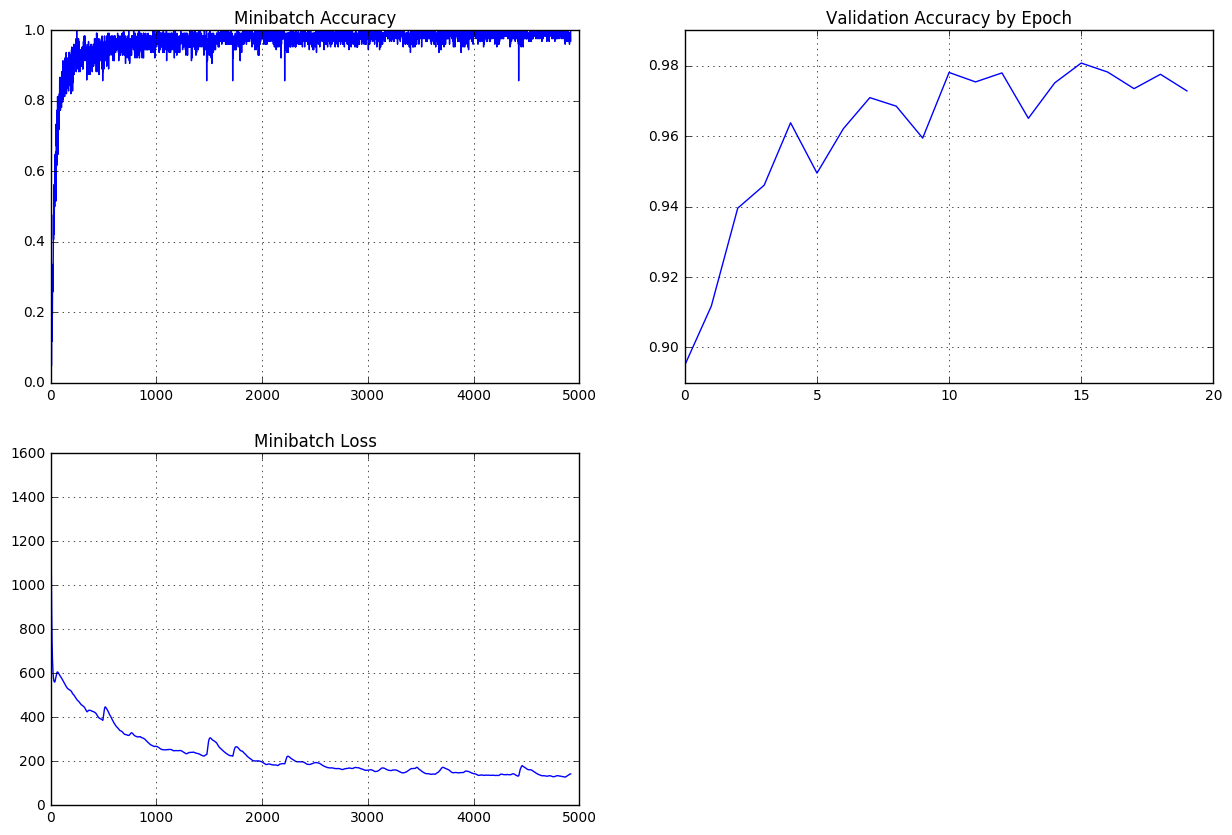

In [11]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

# Minibatch Accuracy
plt.subplot(221)
plt.plot(minibatch_accuracy)
plt.title('Minibatch Accuracy')
plt.grid(True)

# Validation Accuracy by epoch
plt.subplot(222)
plt.plot(epoch_val_accuracy)
plt.title('Validation Accuracy by Epoch')
plt.grid(True)

# Minibatch Accuracy
plt.subplot(223)
plt.plot(minibatch_loss)
plt.title('Minibatch Loss')
plt.grid(True)

plt.show()

In [12]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.913


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**
Here are the hyperparameters that define the final model:
* Epochs: 20
* Optimizer: Adam Optimizer
* Learning Rate: Exponential Decaying Learning Rate starting with 0.001 and decaying every 10000 steps
* Weight Initialization : I used Xavier Optimization to defined the variance during initialization of weights.
* L2 Regularization: Beta = 0.001
* Dropouts: keep probability = 0.7 (Note Dropouts only used in fully connected layers)
* Pooling: I used Average Pooling instead of max_pooling everywhere in the above model


### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**
I started with Lenet architecture and out of the box, I got a validation accuracy of 94.4%. After adding L2 regularization and dropouts, the validation accuracy went up to 95.8%. However, the test accuracy was fairly low. I normalized the image and saw the the validation accuracy went down to around 90%.
In order to improve the validation accuracy of the model, I decided to give Inception model a shot. I had to insert pooling modules between convolutions so as to keep the model's memory requiremnts in check. The inception model after tuning with L2 Regualrization and Dropouts reached a validation accuracy of ~98%. The test accuracy was ~92%.




---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

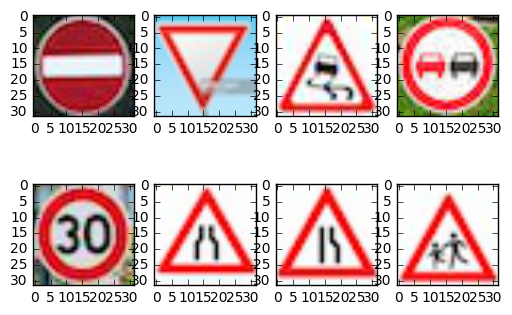

In [13]:
import PIL
from PIL import Image
new_images = []
basewidth = 32
hsize = 32
img = Image.open('new_images/noentry.jpg')
new_images.append(np.array(img.resize((basewidth, hsize), PIL.Image.ANTIALIAS)))
img = Image.open('new_images/yield.jpg')
new_images.append(np.array(img.resize((basewidth, hsize), PIL.Image.ANTIALIAS)))
img = Image.open('new_images/slipperyroad.jpg')
new_images.append(np.array(img.resize((basewidth, hsize), PIL.Image.ANTIALIAS)))
img = Image.open('new_images/nopassing.jpg')
new_images.append(np.array(img.resize((basewidth, hsize), PIL.Image.ANTIALIAS)))
img = Image.open('new_images/30kph.jpg')
new_images.append(np.array(img.resize((basewidth, hsize), PIL.Image.ANTIALIAS)))
img = Image.open('new_images/roadnarrows.jpg')
new_images.append(np.array(img.resize((basewidth, hsize), PIL.Image.ANTIALIAS)))
img = Image.open('new_images/roadnarrowsright.jpg')
new_images.append(np.array(img.resize((basewidth, hsize), PIL.Image.ANTIALIAS)))
img = Image.open('new_images/children.jpg')
new_images.append(np.array(img.resize((basewidth, hsize), PIL.Image.ANTIALIAS)))

### Load the images and plot them here.
### Feel free to use as many code cells as needed.
plt.subplot(241)
plt.imshow(new_images[0])
plt.subplot(242)
plt.imshow(new_images[1])
plt.subplot(243)
plt.imshow(new_images[2])
plt.subplot(244)
plt.imshow(new_images[3])
plt.subplot(245)
plt.imshow(new_images[4])
plt.subplot(246)
plt.imshow(new_images[5])
plt.subplot(247)
plt.imshow(new_images[6])
plt.subplot(248)
plt.imshow(new_images[7])

new_images = np.array(new_images).astype(np.float64)
# Expected Output : 17 13 23 9 1 ? 24 28


In [14]:
for i in range(new_images.shape[0]):
    for j in range(new_images.shape[3]):
        new_images[i,:,:,j] = preprocessing.scale(new_images[i,:,:,j])
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    predictions = sess.run(test_prediction, feed_dict={x: new_images, train: False})
    print(np.argmax(predictions,axis=1))
    top = tf.nn.top_k(tf.constant(predictions), k=3)
    print(sess.run(top))

[17 13 23  9  1  4 24 28]
TopKV2(values=array([[  9.40242231e-01,   5.88837899e-02,   6.90382381e-04],
       [  9.99990106e-01,   7.83068936e-06,   8.99091447e-07],
       [  8.86466742e-01,   1.13441117e-01,   6.32793090e-05],
       [  9.99839902e-01,   9.64607825e-05,   6.21277795e-05],
       [  9.99644041e-01,   2.29070341e-04,   6.10947682e-05],
       [  4.77170408e-01,   2.60215580e-01,   1.05366446e-01],
       [  7.97848523e-01,   1.46059379e-01,   3.68488207e-02],
       [  9.99544322e-01,   2.62816437e-04,   1.08065666e-04]], dtype=float32), indices=array([[17,  9, 33],
       [13, 15, 38],
       [23,  9,  3],
       [ 9, 12, 41],
       [ 1,  5, 39],
       [ 4,  0, 28],
       [24, 31,  2],
       [28, 35, 33]], dtype=int32))


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**
Please see the selected images in cell above. I chose some good quality images, some with a distortion (Yield image) and an image that looks similar to one that the model understands, but slightly different (Road Narrows versus Road narrows on the right).

The main problem I see is that 32x32 is pretty small dimension - especially when the image quality is not good. Also I see that pictures taken from an angle are harder to interpret that ones that taken from right in front of the sign.|

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**
The model predicted all 7 out of the 7 chosen images correctly: 100% accuracy.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**
Please see the computation cell above from the top_k implementation.
The model does a pretty good job of predicting the traffic signs. For the items it gets the prediction right, the probability of certainly most exceed 0.9.


The one sign that did not exist in the dataset that I included was "Road Narrows". From top_k, I see that the model thought that this was either a speed sign 70 (Probability 0.47) and speed sign 20 km/h (Probability: 0,26) or a "children crossing" sign (Probability: 01). The low confidence scores tells me that this model, when confident is pretty accurate. When it is not confident, it is likely to make mistakes.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.